<a href="https://colab.research.google.com/github/MinsooKwak/Study/blob/main/DataManipulate/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_PCA%EC%99%80_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA vs LDA

|         |PCA                       |LDA |
|---------|:------------------------|:--|
|학습 방법 |비지도                    |지도학습 : 차원 축소하며 label의 정보를 최대한 유지|
|축     |- 주성분|- 클래스 분리 최대화하는 축|
|분산   |- 공분산|- 클래스간 분산 최대화 <br><br> - 클래스 내부 분산 최소화  |
|활용   |- 영상 인식 <br><br> - 데이터 압축(차원 감소) <br><br> - 노이즈 제거 <br><br> - 데이터 클래스의 차이가 평균보다 분산의 차이에 있을 때 사용|- classification에 뛰어남 <br><br> - 분류 모델에 적절 <br><br> - 클래스간 차별성을 최대화하는 방향으로 수행됨 <br><br> - 데이터 클래스의 차이가 분산보다 평균에 차이가 있을 때 사용|

<br>

**[용어 참고]** <br>
- 주성분 : 정보 손실을 최소화하기 위해 가장 높은 분산을 가지는 차원으로 차원 축소하는 축

LDA는 PCA와 유사하게 입력 데이터를 저차원 공간에 투영해 차원을 축소하는 기법이다. <br>
PCA는 분산을 최대화하는 차원으로 차원을 축소하는 축인 주성분을 활용하며, 이에 비지도학습 방법이다. <br> 이에 데이터를 압축하거나 노이즈를 제거하는 방식으로 활용이 된다. <br><br>
반면 LDA는 '클래스 분리를 최대화하는 축'에 주목한다. <br> 이에 클래스 간의 분산은 최대화하면서, 클래스 내부에서의 분산은 최소화하도록 한다. <br> 따라서 분류 모델에 적절한 방식이다. <br><br>
데이터의 클래스에 대한 차이가 '평균'보다는 '분산'에 있을 때 PCA를 활용하게 되고, <br>데이터의 클래스의 차이가 '분산'보다는 '평균'에 차이가 있을 때 LDA를 활용하게 된다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA                                 # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA

In [ ]:
iris = load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = iris.data
y = iris.target

In [ ]:
target_names = iris.target_names

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
print(f'features_names 속성은 다음과 같다 : \n{iris.feature_names}\n')
print(f'target_names   속성은 다음과 같다 : \n{iris.target_names}\n')

features_names 속성은 다음과 같다 : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names   속성은 다음과 같다 : 
['setosa' 'versicolor' 'virginica']



In [ ]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target_label'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df2 = pd.DataFrame(data=X_scaled, columns=iris.feature_names)
df2['traget_label']=y

df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),traget_label
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


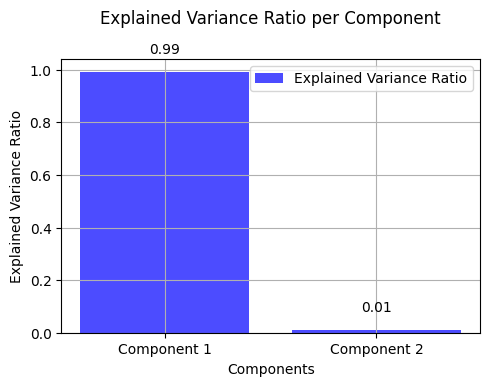

In [ ]:
# LDA 모델 훈련
lda_X = LinearDiscriminantAnalysis()
lda_X.fit(X,y)

# explained_various_ratio를 통해 비율 얻기
explained_variance_ratios = lda_X.explained_variance_ratio_

# 시각화
n_components = len(explained_variance_ratios)
component_labels = [f'Component {i+1}' for i in range(n_components)]

plt.figure(figsize=(5,4))
plt.bar(component_labels, explained_variance_ratios, alpha=0.7, label='Explained Variance Ratio', color='b')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')

# 제목 위치 조정
plt.title('Explained Variance Ratio per Component', y=1.1, fontsize=12)

# 분산 비율 명시
for i,ratio in enumerate(explained_variance_ratios):
  plt.text(i, ratio+0.06, f'{ratio:.2f}', ha='center', va='bottom', fontsize=10)


plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**LDA**

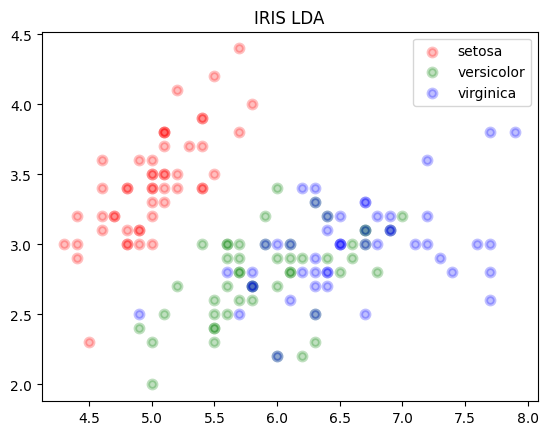

In [ ]:
colors = ['r','g','b']

for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(
      X[y==i, 0], X[y==i,1], color=color, alpha=0.25, lw=2.5, label=target_name
  )

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('IRIS LDA')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


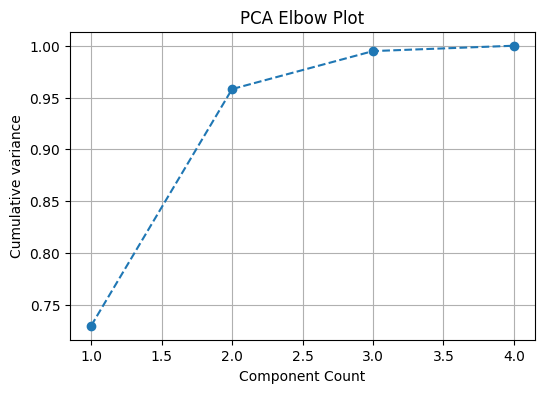

In [ ]:
# PCA 모델 생성
pca1 = PCA()
X_pca1 = pca1.fit_transform(X_scaled)

print('explained variance ratio: %s'%str(pca1.explained_variance_ratio_))

# PCA의 elbow plot 그리기
explained_variance_ratio = pca1.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Component Count')
plt.ylabel('Cumulative variance')
plt.title('PCA Elbow Plot')
plt.grid(True)
plt.show()

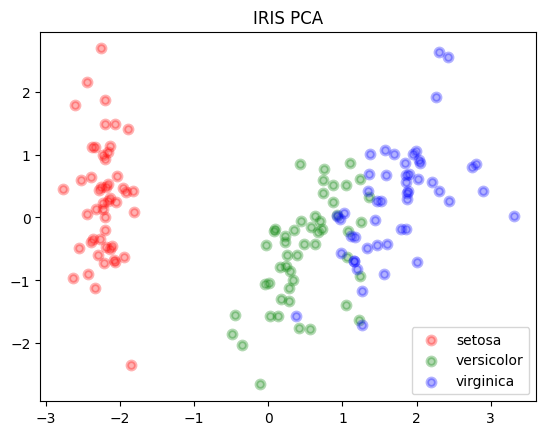

In [ ]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure()
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_pca2[y==i,0], X_pca2[y==i,1], color=color, alpha=0.3, lw=2.5, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('IRIS PCA')
plt.show()